### Lesson End Project

In [1]:


import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import  wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

#Tokenize Function
def Tokenize(string):
    tokens=nltk.tokenize.word_tokenize(string)
    return " ".join(tokens)

#RemoveStopWordsFunction
def RemoveStopWords(string):
    #Removing Punctuations
    for each in punctuation:
        string=string.replace(each,"")
    
    #Removing Stopwords
    english_stopwords=stopwords.words('english')
    stopwords_removed_tokens=[]
    words=string.split(" ")
    
    for each in words:
        if each not in english_stopwords:
            stopwords_removed_tokens.append(each)
    return " ".join(stopwords_removed_tokens) 


#LemmatizeFunction
def Lemmatize(string):
    word_lem=WordNetLemmatizer()
    words=string.split() 
    lemmatizeWords=[]
    for each in words:
        try:
            lemmatizeWords.append(word_lem.lemmatize(each))
        except:
            continue
    return " ".join(lemmatizeWords)

def Refine(string):
    return Lemmatize(RemoveStopWords(Tokenize(string)))



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atul.singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [2]:
#Read all the files from all subfolders and store their summaries in a single CSV file.
#Name CSV File as: “BBCNewsArticles.csv”

import os
data=[]
for path,folders,files in os.walk('BBC News Articles'):
    for each in files:
        if each.endswith('txt'):
            f=open(path+"//"+each,'r')
            content=f.read()
            data.append(content)
            f.close()
        
import pandas as pd
df=pd.DataFrame(data,columns=['Article'])
df.to_csv('BBCNewsArticles.csv',index=False)    

In [3]:
#Randomly arrange the data 
from sklearn.utils import shuffle
df = shuffle(df)

In [4]:
#Preprocess the data

#Set system encoding to utf-8
#import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

#Use the refine module
df['Refined-Article']=list(map(lambda x: Refine(x),df['Article']))

In [5]:
#On the preprocessed text, perform Vectorization using 3 types of vectors.

#use previous Vectorization file made in earlier module
from Vectorization import *

#“PresenceAbsenceVector”: Converts Article to vectors using Presence and Absence of Words
df['Refined-Article-Presence-Absence-Vectorized']=PresenceAbsenceVectorization(df['Refined-Article'])

In [6]:
#“CountVector”: Converts Article to vectors using Count of Words
df['Refined-Article-Count-Vectorized']=CountVectorization(df['Refined-Article'])

In [7]:
#"TF-IDFVector”: Converts Article to vectors using TF-IDF vectorization
df['Refined-Article-TFIDF-Vectorized']=TFIDFVectorization(df['Refined-Article'])

In [8]:
#Perform clustering on the dataset using all 3 different types of vectorizations. The number of clusters should be 5. 


from sklearn.cluster import KMeans


#Clustering on Presence and Absence Vectorization 
X_PresenceAndAbsenceVectorization=list(df['Refined-Article-Presence-Absence-Vectorized'])
kmeans_PresenceAndAbsenceVectorization = KMeans(n_clusters=5, random_state=0).fit(X_PresenceAndAbsenceVectorization)
labels_PresenceAndAbsenceVectorization=kmeans_PresenceAndAbsenceVectorization.labels_


#Clustering on Count Vectorization
X_CountVectorization=list(df['Refined-Article-Count-Vectorized'])
kmeans_CountVectorization = KMeans(n_clusters=5, random_state=0).fit(X_CountVectorization)
labels_CountVectorization=kmeans_CountVectorization.labels_

#Clustering on TFIDF Vectorization
X_TFIDFVectorization=list(df['Refined-Article-TFIDF-Vectorized'])
kmeans_TFIDFVectorization = KMeans(n_clusters=5, random_state=0).fit(X_TFIDFVectorization)
labels_TFIDFVectorization=kmeans_TFIDFVectorization.labels_


In [9]:
#Save the Clusters Label for each model 
df['labels_PresenceAndAbsenceVectorization']=labels_PresenceAndAbsenceVectorization
df['labels_CountVectorization']=labels_CountVectorization
df['labels_TFIDFVectorization']=labels_TFIDFVectorization

df.to_csv('BBCNewsArticlesClustered.csv',index=False)

In [10]:
#Compute Silhoutte Score
from sklearn.metrics import silhouette_score

print (silhouette_score(list(df['Refined-Article-Presence-Absence-Vectorized']),df['labels_PresenceAndAbsenceVectorization']))

print (silhouette_score(list(df['Refined-Article-Count-Vectorized']),df['labels_CountVectorization']))

print( silhouette_score(list(df['Refined-Article-TFIDF-Vectorized']),df['labels_TFIDFVectorization']))

-0.009724511430415781
0.10498481324585775
0.01599482984114089


In [11]:
#Plotting results
import matplotlib.pyplot as plt

                                        Article
labels_PresenceAndAbsenceVectorization         
0                                             1
1                                             1
2                                             3
3                                             1
4                                           173


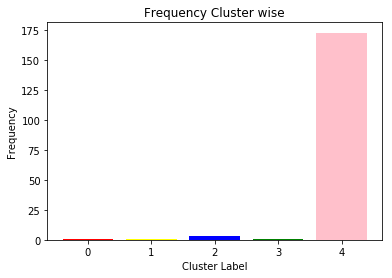

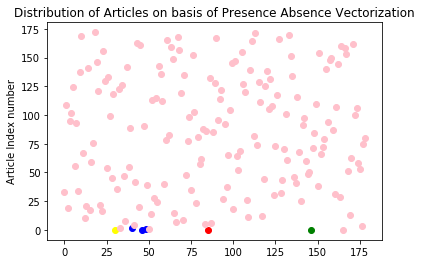

In [12]:
counts=df.groupby('labels_PresenceAndAbsenceVectorization')[['Article']].count()
print (counts)
plt.bar(counts.index,counts['Article'],color=['red','yellow','blue','green','pink'],align="center")
plt.title("Frequency Cluster wise")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.show()


for group,subset in df.groupby('labels_PresenceAndAbsenceVectorization'):
    if group==0:
        plt.scatter(subset.index,range(len(subset)),c='red',edgecolors='face')
    elif group==1:
        plt.scatter(subset.index,range(len(subset)),c='yellow',edgecolors='face')
    elif group==2:
        plt.scatter(subset.index,range(len(subset)),c='blue',edgecolors='face')
    elif group==3:
        plt.scatter(subset.index,range(len(subset)),c='green',edgecolors='face')
    else:
        plt.scatter(subset.index,range(len(subset)),c='pink',edgecolors='face')
plt.title("Distribution of Articles on basis of Presence Absence Vectorization")
plt.ylabel("Article Index number")        
plt.show()  



                           Article
labels_CountVectorization         
0                               12
1                              125
2                                7
3                               34
4                                1


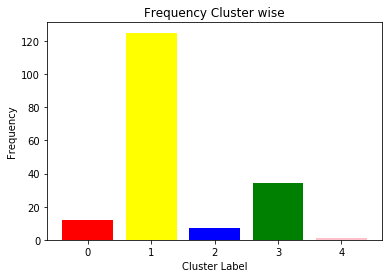

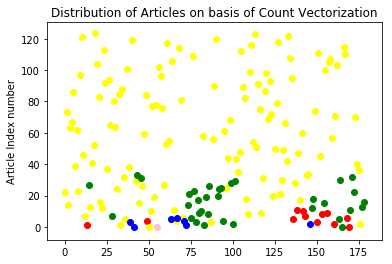

In [13]:
counts=df.groupby('labels_CountVectorization')[['Article']].count()
print (counts)
plt.bar(counts.index,counts['Article'],color=['red','yellow','blue','green','pink'],align="center")
plt.title("Frequency Cluster wise")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.show()


for group,subset in df.groupby('labels_CountVectorization'):
    if group==0:
        plt.scatter(subset.index,range(len(subset)),c='red',edgecolors='face')
    elif group==1:
        plt.scatter(subset.index,range(len(subset)),c='yellow',edgecolors='face')
    elif group==2:
        plt.scatter(subset.index,range(len(subset)),c='blue',edgecolors='face')
    elif group==3:
        plt.scatter(subset.index,range(len(subset)),c='green',edgecolors='face')
    else:
        plt.scatter(subset.index,range(len(subset)),c='pink',edgecolors='face')
plt.title("Distribution of Articles on basis of Count Vectorization")
plt.ylabel("Article Index number")        
plt.show()  

                           Article
labels_TFIDFVectorization         
0                               40
1                               66
2                               33
3                               17
4                               23


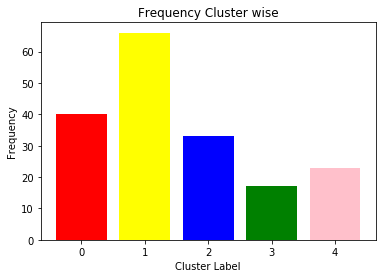

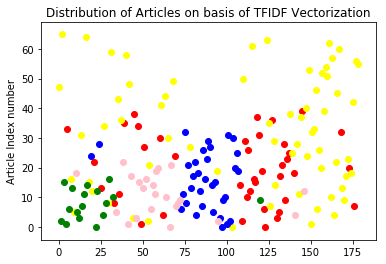

In [14]:
counts=df.groupby('labels_TFIDFVectorization')[['Article']].count()
print (counts)
plt.bar(counts.index,counts['Article'],color=['red','yellow','blue','green','pink'],align="center")
plt.title("Frequency Cluster wise")
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.show()

for group,subset in df.groupby('labels_TFIDFVectorization'):
    if group==0:
        plt.scatter(subset.index,range(len(subset)),c='red',edgecolors='face')
    elif group==1:
        plt.scatter(subset.index,range(len(subset)),c='yellow',edgecolors='face')
    elif group==2:
        plt.scatter(subset.index,range(len(subset)),c='blue',edgecolors='face')
    elif group==3:
        plt.scatter(subset.index,range(len(subset)),c='green',edgecolors='face')
    else:
        plt.scatter(subset.index,range(len(subset)),c='pink',edgecolors='face')
plt.title("Distribution of Articles on basis of TFIDF Vectorization")
plt.ylabel("Article Index number")        
plt.show()  

## Answers to questions 